# Feature extraction + KMeans

### Création d'un lexique pour chaque catégories 
On créé un lexique pour chaque catégorie afin de pouvoir assigner chaque cluster à une catégories en fonction d'un pourcentage d'occurence des mots.

In [57]:
lexique = {
    "Université": ["campus", "professor", "lecture", "semester", "degree", "enrollment", "tuition", "dormitory", "library", "exam", "grade", "credit", "major", "minor", "class", "lecture hall", "research", "thesis", "dissertation", "plagiarism", "academic integrity", "curriculum", "internship", "fellowship", "grant", "bursary", "tuition fee", "scholarship", "fellowship", "grant", "bursary"],
    "Publicités et Newletters": ["advertising", "promotion", "marketing", "sales", "banner", "brochure", "catalog", "flyer", "poster", "billboard", "commercial", "infomercial", "endorsement", "testimonial", "mailing list", "newsletter", "email marketing", "influencer marketing", "customer acquisition", "conversion rate", "offer", "discount", "product"],
    "Commandes et Tickets": ["order", "purchase", "checkout", "shopping cart", "invoice", "receipt", "ticket", "reservation", "booking", "confirmation", "cancellation", "refund", "delivery", "shipping", "tracking", "customer service", "call center", "hotline", "escalation", "complaint", "feedback", "review", "rating", "warranty", "guarantee", "return policy", "exchange policy"],
    "Banque et Factures": ["bank", "savings account", "checking account", "credit card", "debit card", "ATM", "online banking", "mobile banking", "investment", "asset", "liability", "interest", "fees", "charge", "balance", "transaction", "deposit", "withdrawal", "transfer", "loan", "mortgage", "insurance", "bill", "invoice", "statement", "payment", "late fee", "penalty"],
    "Rendez-vous": ["appointment", "meeting", "schedule", "agenda", "calendar", "deadline", "reminder", "notification", "confirmation", "cancellation", "reschedule", "no-show", "waiting list", "booking", "reservation", "availability", "flexibility", "urgency", "priority", "request", "proposal", "offer", "counteroffer", "negotiation", "agreement", "disagreement", "compromise"],
    "Réseaux Sociaux": ["social media", "network", "platform", "profile", "timeline", "feed", "friend", "follower", "like", "comment", "share", "tag", "hashtag", "mention", "DM", "PM", "post", "tweet", "status", "story", "live", "video", "photo", "image", "link", "hashtag", "trending", "viral", "influencer", "advertising", "marketing"],
    "Administratif": ["administration", "office", "manager", "staff", "employee", "human resources", "personnel", "policy", "procedure", "regulation", "law", "contract", "agreement", "permit", "license", "certificate", "document", "record", "file", "archive", "database", "system", "software", "hardware", "network", "security", "access", "privilege", "permission"],
    "Candidatures job et milieu Professionnel": ["job", "application", "employment", "career", "professional", "work", "resume", "CV", "cover letter", "application", "interview", "selection", "hiring", "promotion", "training", "development", "performance", "evaluation", "feedback", "review", "salary", "benefit", "perk", "incentive", "bonus", "raise", "promotion", "advancement", "progression", "succession"],
    "Comptes et Mots de passe": ["account", "username", "password", "login", "logout", "security", "privacy", "protection", "encryption", "authentication", "verification", "authorization", "access", "permission", "privilege", "restriction", "violation", "hacking", "phishing", "spam", "virus", "malware", "ransomware", "trojan", "worm", "spyware", "adware", "popup"],
    "Logement": ["housing", "rent", "rental", "home", "residence", "apartment", "condo", "townhouse", "mansion", "villa", "manor", "cottage", "farmhouse", "landlord", "tenant", "rent", "lease", "agreement", "contract", "mortgage", "property", "real estate", "development", "construction", "renovation", "furniture", "appliance", "utility", "amenity", "facility"]
}

### Tfidf : Feature extraction

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [59]:
final_dataset = pd.read_csv("datacleaned/df_10000.CSV")
final_dataset = final_dataset.drop(['Unnamed: 0'], axis=1) #remove columns creted bc of the to_csv() in the cleaning
final_dataset = final_dataset.iloc[0:10000]
print(final_dataset.shape)
for i in final_dataset['corps']:
    if ('nan' in i) and (len(i)<100):
        print(i)
        break

# final_dataset = final_dataset.loc(final_dataset['corps'] != ['nan'])
print(final_dataset.isna().sum().sum())
final_dataset.head()

(10000, 3)
['monoprix', 'operation', 'rcs', 'nanterre']
0


,objet,corps,adresse
0,"[']', 'mission', 'promotion', 'important', 'me...","['dear', 'student', 'ambassador', 'lutt', 'you...","['etudiants-request', 'utt', 'fr']"
1,"[']', 'message', 'pierre', 'koch', 'personal',...","['english', ']', 'dear', 'fellow', 'student', ...","['etudiants-request', 'utt', 'fr']"
2,"['your', 'instagram', 'password', 'change']","['this', 'confirmation', 'password', 'instagra...","['no-reply', 'mail.instagram', 'com']"
3,"[']', 'fwd', 'challenge', 'inter', 'entreprise...","['de', 'michel', 'legault', 'sport', 'cc', 'sd...","['sport-request', 'utt', 'fr']"
4,"['confirmation', 'ter', 'ticket', 'order']","['confirmation', 'trip', 'monday', 'november',...","['mesbilletsTER-noreply', 'ter-sncf', 'fr']"


In [60]:
# initialize the vectorizer
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(final_dataset['corps'])

print(f"n_samples: {X.shape[0]}, n_features: {X.shape[1]}")

words = vectorizer.get_feature_names()


n_samples: 10000, n_features: 34191


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### PCA

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(10000, 4059)

### Run le kmeans avec differents nb de clusters en vue de la elbow method

In [62]:
from sklearn import metrics
from scipy.spatial.distance import cdist

# run kmeans with many different k
distortions = []
K = range(2, 30)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])


In [63]:
print('Found distortion for {} clusters'.format(k))

Found distortion for 29 clusters


### Plot les résultats : elbow method

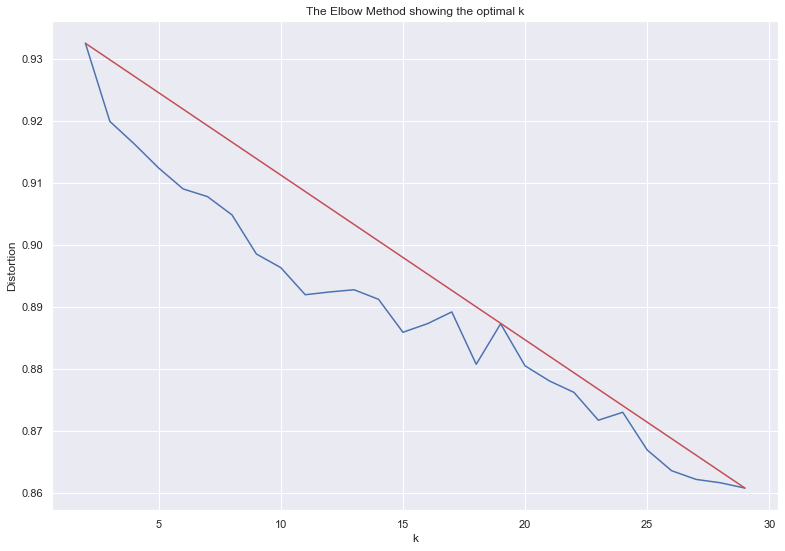

In [64]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### run le kmeans avec le nombre optimal du elbow (k= 12)

In [65]:
k = 12
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
final_dataset['cluster'] = y_pred

### Evaluer notre KMeans sur nos 1000 emails de test

In [78]:
dataset_eval = pd.read_csv("data/evaluation_1000.csv")
dataset_eval = dataset_eval.drop(['Unnamed: 0'], axis=1) #remove columns creted bc of the to_csv() in the cleaning

dataset_eval.head()

,corps,cat
0,"['dropboxes', 'be', 'ready', 'please', 'note',...",Université
1,"['hello', 'salome', 'note', 'take', 'retake', ...",Université
2,"['dear', 'create', 'team', 'dropboxe', 'please...",Université
3,"['christine', 'degot', 'invite', 'meet', 'zoom...",RDV
4,"['hello', 'salome', 'you', 'yet', 'connect', '...",Université


In [87]:
# initialize the vectorizer
vectorizer2 = TfidfVectorizer()

X_eval = vectorizer2.fit_transform(dataset_eval['corps'])

print(f"n_samples: {X_eval.shape[0]}, n_features: {X_eval.shape[1]}")

words = vectorizer2.get_feature_names()

X_eval.shape

n_samples: 1000, n_features: 7417


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(1000, 7417)

### Reduction de dimension avec t-SNE

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=50)  # Changed perplexity from 100 to 50 per FAQ
X_embedded = tsne.fit_transform(X.toarray())

C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 4.091s...
[t-SNE] Computed neighbors for 10000 samples in 106.557s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 97.643097
[t-SNE] KL divergence after 1000 iterations: 1.893530


### A quoi ressemblent nos données en 2 dimensions

In [ ]:
X_embedded[:,0]

array([  6.7699614,  -9.141937 ,  14.230307 , ..., -79.76575  ,
        -7.2730336,  65.5637   ], dtype=float32)

<ipython-input-12-b7d0197cf489>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=palette)


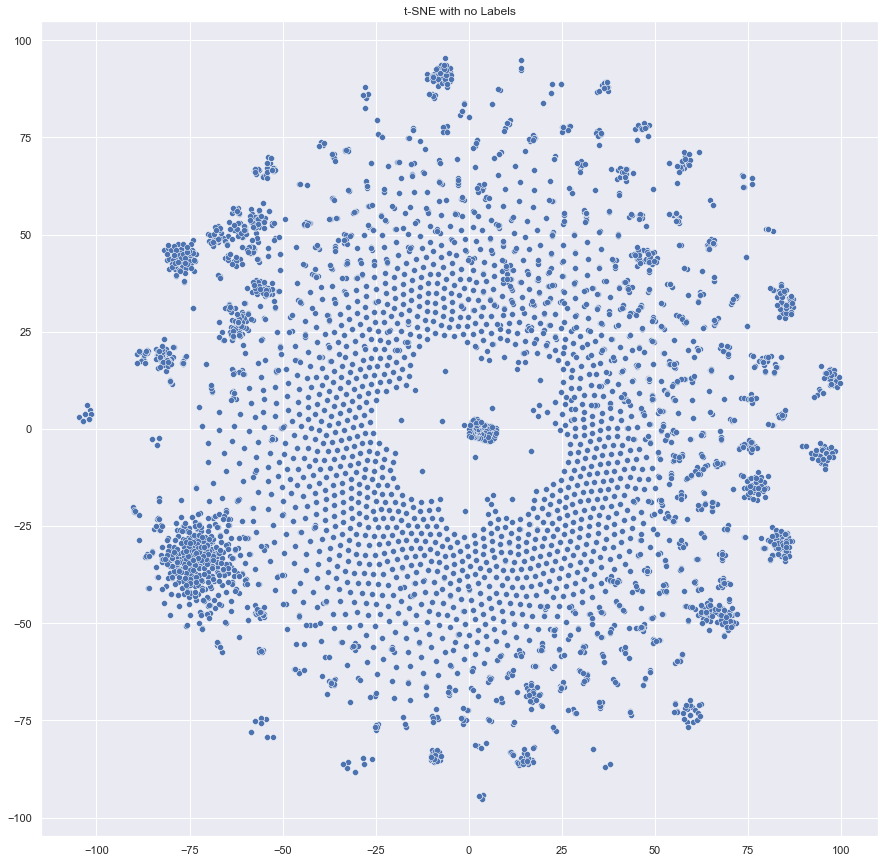

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=palette)
plt.title('t-SNE with no Labels')
plt.savefig("t-sne_10kemails.png")
plt.show()

### On colore avec les labels

<ipython-input-13-d61f142da3cf>:12: UserWarning: The palette list has more values (20) than needed (12), which may not be intended.
  sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_pred, legend='full', palette=palette)


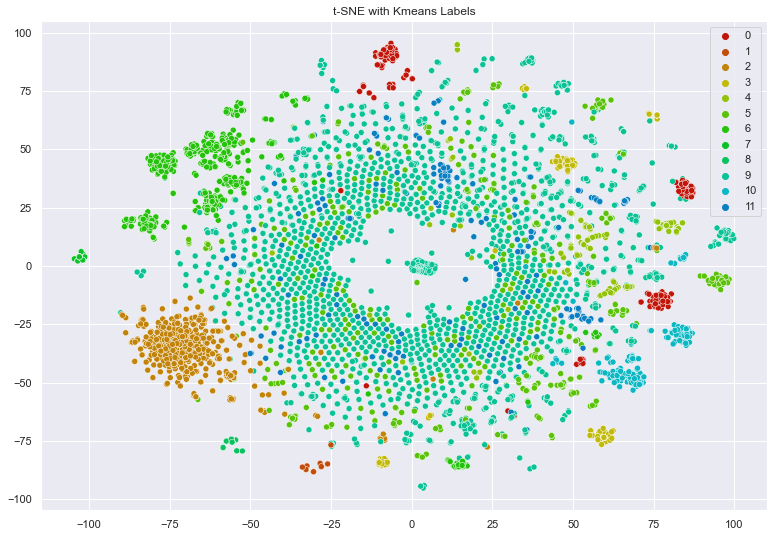

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(13,9)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("improved_cluster_tsne_10kemails.png")
plt.show()

### Topic modelling (avec LDA)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizers = []
    
for ii in range(0, 12):
    # Creating a vectorizer
    vectorizers.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))

In [ ]:
vectorizers[0]

CountVectorizer(max_df=0.9, min_df=5, stop_words='english',
                token_pattern='[a-zA-Z\\-][a-zA-Z\\-]{2,}')

In [ ]:
vectorized_data = []

for current_cluster, cvec in enumerate(vectorizers):
    try:
        vectorized_data.append(cvec.fit_transform(final_dataset.loc[final_dataset['cluster'] == current_cluster, 'corps']))
    except Exception as e:
        print("Not enough instances in cluster: " + str(current_cluster))
        vectorized_data.append(None)

In [ ]:
len(vectorized_data)

12

In [ ]:
# number of topics per cluster
NUM_TOPICS_PER_CLUSTER = 12


lda_models = []

for ii in range(0, 12):
    # Latent Dirichlet Allocation Model
    lda = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='online',verbose=False, random_state=42)
    lda_models.append(lda)
    
lda_models[0]

LatentDirichletAllocation(learning_method='online', n_components=12,
                          random_state=42, verbose=False)

In [ ]:
clusters_lda_data = []

for current_cluster, lda in enumerate(lda_models):
    print("Current Cluster: " + str(current_cluster))

    if current_cluster < 12:
        if (vectorized_data[current_cluster] != None):
            clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))

Current Cluster: 0
Current Cluster: 1
Current Cluster: 2
Current Cluster: 3
Current Cluster: 4
Current Cluster: 5
Current Cluster: 6
Current Cluster: 7
Current Cluster: 8
Current Cluster: 9
Current Cluster: 10
Current Cluster: 11


In [ ]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=3):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values

In [ ]:
all_keywords = []
for current_vectorizer, lda in enumerate(lda_models):
    print("Current Cluster: " + str(current_vectorizer))

    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(selected_topics(lda, vectorizers[current_vectorizer]))

Current Cluster: 0
Current Cluster: 1
Current Cluster: 2
Current Cluster: 3
Current Cluster: 4
Current Cluster: 5
Current Cluster: 6
Current Cluster: 7
Current Cluster: 8
Current Cluster: 9
Current Cluster: 10
Current Cluster: 11


In [ ]:
i=0
for w in all_keywords:
    print("KEYWORDS pour le cluster "+str(i)+" : ", w)
    i=i+1



KEYWORDS pour le cluster 0 :  ['lydia', 'paris', 'offer', 'stage', 'work', 'new', 'transfer', 'change', 'payment', 'free', 'month', 'communication', 'placement', 'account', 'eur', 'bank', 'head', 'kid', 'use']
KEYWORDS pour le cluster 1 :  ['rent', 'studio', 'room']
KEYWORDS pour le cluster 2 :  ['lutt', 'address', 'troyes', 'sport', 'isi', 'prevent', 'decline', 'day', 'holiday', 'activity', 'student', 'par', 'registration', 'piece', 'international', 'content', 'use', 'send', 'semester', 'michel', 'mission', 'baptiste', 'guichard', 'list', 'document', 'benoit', 'fellow', 'enrich', 'reopen']
KEYWORDS pour le cluster 3 :  ['digitale', 'converse', 'write', 'lusine', 'cnil', 'right', 'address', 'gaulle', 'infopro', 'mail', 'send', 'datum', 'contact', 'personal', 'essec', 'school', 'advert', 'business', 'ndeg', 'deposit']
KEYWORDS pour le cluster 4 :  ['june', 'day', 'apr', 'oct', 'hollyhill', 'price', 'event', 'central', 'wednesday', 'time', 'thursday', 'summer', 'tuesday', 'jul', 'list', 

In [ ]:
# utiliser le lexique
i=0
categories = {}

for w in all_keywords:
    j = 0
    word_occurence = []
    for cat in lexique:
        nb = 0
        for lex in lexique[cat]:
            if lex in w:
                nb = nb+1
        word_occurence.append(nb)
    cat_number = word_occurence.index(max(word_occurence))
    print(word_occurence)
    keys = list(lexique.keys())
    # Use the index to access the key
    key = keys[cat_number]
    categories[i] = key
    print("CATEGORIE pour le cluster "+str(i)+" : ", key)
    i=i+1

[0, 1, 0, 3, 1, 0, 0, 1, 1, 0]
CATEGORIE pour le cluster 0 :  Banque et Factures
[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
CATEGORIE pour le cluster 1 :  Logement
[1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
CATEGORIE pour le cluster 2 :  Université
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
CATEGORIE pour le cluster 3 :  Banque et Factures
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
CATEGORIE pour le cluster 4 :  Candidatures job et milieu Professionnel
[0, 1, 0, 0, 1, 0, 1, 4, 1, 0]
CATEGORIE pour le cluster 5 :  Candidatures job et milieu Professionnel
[0, 0, 0, 0, 0, 4, 1, 2, 0, 0]
CATEGORIE pour le cluster 6 :  Réseaux Sociaux
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
CATEGORIE pour le cluster 7 :  Université
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
CATEGORIE pour le cluster 8 :  Réseaux Sociaux
[0, 1, 1, 0, 2, 0, 0, 5, 1, 0]
CATEGORIE pour le cluster 9 :  Candidatures job et milieu Professionnel
[0, 2, 2, 0, 1, 0, 0, 1, 0, 0]
CATEGORIE pour le cluster 10 :  Publicités et Newletters
[0, 0, 1, 2, 0, 0, 1, 0, 0, 0]
CATEGORIE pour le cluster 11 :  Banqu

In [ ]:
len(all_keywords)

12

In [ ]:
# # # initialize kmeans with 3 centroids
# # kmeans = KMeans(n_clusters=3, random_state=42)
# # # fit the model
# # kmeans.fit(X)
# # # store cluster labels in a variable
# # clusters = kmeans.labels_

# def find_optimal_clusters(data, max_k):
#     Sum_of_squared_distance = []
#     K = range(1,max_k)
#     for k in K:
#         km = KMeans(n_clusters = k)
#         km = km.fit(data)
#         Sum_of_squared_distance.append(km.inertia_)
#     plt.plot(K, Sum_of_squared_distance, 'bx-')
#     plt.xlabel('k')
#     plt.ylabel('Sum of squared distance')
#     plt.title('Elbow method')
#     plt.xticks(K)
#     plt.show()
    
# find_optimal_clusters(X, 20)

In [ ]:
# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=12, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_



In [ ]:
unique, counts = np.unique(clusters, return_counts=True)
d = dict(zip(unique, counts))
d

{0: 4145,
 1: 800,
 2: 690,
 3: 624,
 4: 125,
 5: 876,
 6: 232,
 7: 61,
 8: 178,
 9: 74,
 10: 1987,
 11: 208}

In [ ]:
df_k = final_dataset
df_k['clusters'] = clusters
df_k0 = df_k.loc[df_k['clusters'] == 7]
df_k0

,objet,corps,adresse,cluster,clusters
23,['nan'],['nan'],"['sam.noel', 'utt', 'fr']",9,7
271,['papier'],['nan'],"['vwalbaum73', 'gmail', 'com']",9,7
536,['nan'],['nan'],"['antoinetommasi', 'me', 'com']",9,7
630,['music'],['nan'],"['sam.noel', 'utt', 'fr']",9,7
693,"['gantt', 'pauluitoo']",['nan'],"['paul.duperray', 'hotmail', 'com']",9,7
...,...,...,...,...,...
9452,['nan'],['nan'],"['chi_nguyen.tran', 'utt', 'fr']",9,7
9455,['nan'],['nan'],"['jfbenoit', 'erinette', 'fr']",9,7
9834,['prod'],['nan'],"['can.u.beats', 'gmail', 'com']",9,7
9883,['cvec'],['nan'],"['verojf', 'wanadoo', 'fr']",9,7


In [ ]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : hello, the, good, we, student, de, project, you, course, day
1 : baptiste, application, datum, we, thank, guichard, good, contact, position, internship
2 : linkedin, ireland, wilton, unlimited, company, plaza, oscar, france, dublin, network
3 : message, attachment, possible, utt, contamination, cause, internet, damage, immediately, virus
4 : password, connection, character, change, my, ip, use, different, do, account
5 : troyes, university, student, utt, technology, marie, curie, cs, rue, tel
6 : store, monoprix, offer, valid, monoprixfr, selection, history, immediate, eur, product
7 : nan, 的startup, federative, federe, federer, federerer, federico, fedfefaedb, fee, feeb
8 : lydia, account, intermediaire, avenue, eur, paris, solution, sum, operation, stockx
9 : duty, give, job, matta, nada, work, you, deliver, feedback, your
10 : eur, account, we, email, you, your, please, message, paris, receive
11 : eur, particulier, rental, paris, stage, apartment, month, search, ad, correspond


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

NameError: name 'x' is not defined